# Tutorial 3. Pseudo Data

In [1]:
import numpy as NP
import matplotlib.pylab as PLT

## 1. Defince the functions 

Let's make a fake data with pseudo-signal and background noice. The signal is used *Gaussian* distribution function as

$$
y_{\text{signal}}(x) = ae^{-(\frac{x-\mu}{\sigma})^2}+c\ ,
$$

where $a$ is the amplitude; $\mu$ is the mean value; $\sigma$ is the uncertainty; and $c$ is the constant. The background noice is used *exponential* distribution function as 

$$
y_{\text{noice}}(x) = ae^{bx}+c\ ,
$$

where $a$ is the amplitude; $b$ is the decay rate; and $c$ is the constant. The functions are bellow

In [2]:
def exponential(x, a, b, c):
    return a*NP.exp(b*x) + c

def gaussian(x, a, mean, sigma, c):
    return a * NP.exp( - ((x - mean) / sigma) ** 2) + c

### 1.1. First namespace class

Different from usual function defination, sometime we prefer to collect the functions in a ***"namespace"*** for classifing your functions well. 

In [3]:
# namespace class
class NoisySignal:
    
    latex = {'signal':r'$y(x) = ae^{-(\frac{x-\mu}{\sigma})^2}+c$',
             'noise':r'$y(x) = ae^{bx}+c$'} 
    
    def signal(x, a, mean, sigma, c):
        """
        Signal distribution with Gaussian distribution function
        """
        return gaussian(x, a, mean, sigma, c)
    
    def noise(x, a, b, c):
        """
        Background noice with Exponential distribution function
        """
        return exponential(x, a, b, c)
    
    def y(x, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c):
        """
        Signal and background noince mixed distribution function
        """
        return NoisySignal.noise(x, n_a, n_b, n_c) + \
               NoisySignal.signal(x, s_a, s_mean, s_sigma, s_c)
    
    def pdf(x, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c):
        """
        Nomalized signal and background noince mixed distribution function
        """
        y = NoisySignal.y(x, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c)
        y = y/NP.sum(y)
        return y

### 1.2. Make noisy signal distribution

In [4]:
xs = NP.linspace(0,20,100)
# gaussian signal parameters
s_a = 0.5
s_mean = 10 
s_sigma = 1.5
s_c = 0
# exponential noise parameters
n_a = 2 
n_b = -0.1 
n_c = 0
# noisy signal
ys = NoisySignal.y(xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c)
ys_signal = NoisySignal.signal(xs, s_a, s_mean, s_sigma, s_c)
ys_noice = NoisySignal.noise(xs, n_a, n_b, n_c)

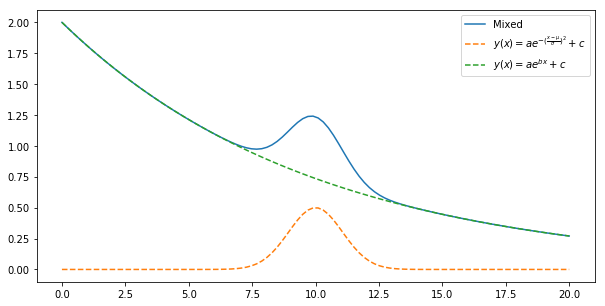

In [5]:
PLT.figure(figsize=[10,5])
PLT.plot(xs, ys, label='Mixed')
PLT.plot(xs, ys_signal, '--', label=NoisySignal.latex['signal'])
PLT.plot(xs, ys_noice, '--', label=NoisySignal.latex['noise'])
PLT.legend()

## 3. Generate pseudo data with Monte Carlo method
The noisy signal distriubtion is combined by decay exponential distribution and gaussian distribution.

In [6]:
# object class
class MC(object):
    
    def __init__(self, xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c, seed=0):
        """
        Constructor of object class
        """
        # random seed
        self.seed = seed
        # x-axis values
        self.xs = xs
        # noisy-singal parameters
        self.p0 = [s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c]
        # noisy-signal pdf
        self.pdf = NoisySignal.pdf(xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c) 
        
    def generate(self, n):
        """
        Generate pseudo-data with the random number obeying the given PDF (Monte Carlo method)
        """
        # set the seed (the begin of the sequence pseudo-random numbers)
        NP.random.seed = self.seed
        # generate random number with given x-axis possible value, number of generated data, and given PDF  
        data = NP.random.choice(self.xs, n, p=self.pdf)
        return data

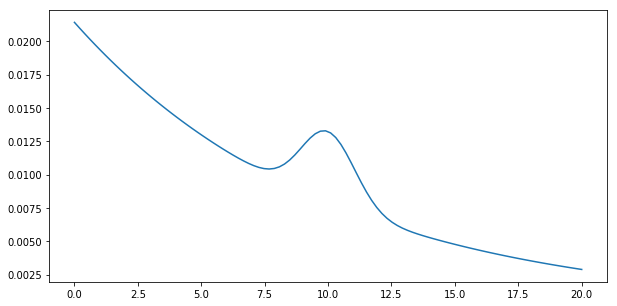

In [7]:
# Call the MC class
mc = MC(xs, s_a, s_mean, s_sigma, s_c, n_a, n_b, n_c)
# Draw the normalized distriubtion function (PDF)
PLT.figure(figsize=[10,5])
PLT.plot(mc.xs, mc.pdf)

In [8]:
# generate psuedo data with random function
data = mc.generate(1000)
print('Data size : ', len(data))

Data size :  1000


(array([44., 49., 36., 35., 36., 30., 35., 25., 44., 29., 33., 30., 26.,
        38., 25., 27., 13., 19., 14., 27., 20., 28., 14., 19., 22., 25.,
        20., 23., 25., 19., 17., 10., 15., 12.,  8., 18., 10., 12.,  8.,
         6.,  7., 10.,  4.,  6.,  5.,  1.,  6.,  3.,  6.,  6.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,
         4.4,  4.8,  5.2,  5.6,  6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,
         8.8,  9.2,  9.6, 10. , 10.4, 10.8, 11.2, 11.6, 12. , 12.4, 12.8,
        13.2, 13.6, 14. , 14.4, 14.8, 15.2, 15.6, 16. , 16.4, 16.8, 17.2,
        17.6, 18. , 18.4, 18.8, 19.2, 19.6, 20. ]),
 <a list of 50 Patch objects>)

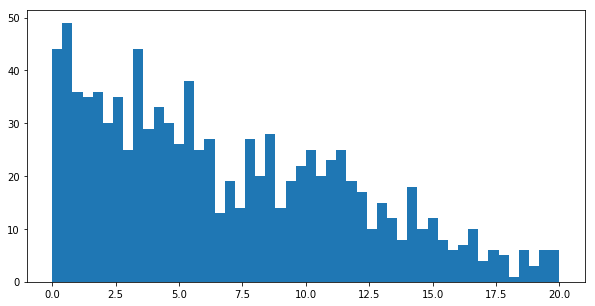

In [9]:
# Make histogram
PLT.figure(figsize=[10,5])
PLT.hist(data, bins=50, range=[0,20])

In [10]:
# generate psuedo data with random function and different size of data
data = []
for n in [100, 500, 1000, 5000, 10000, 50000]:
    data.append(mc.generate(n))

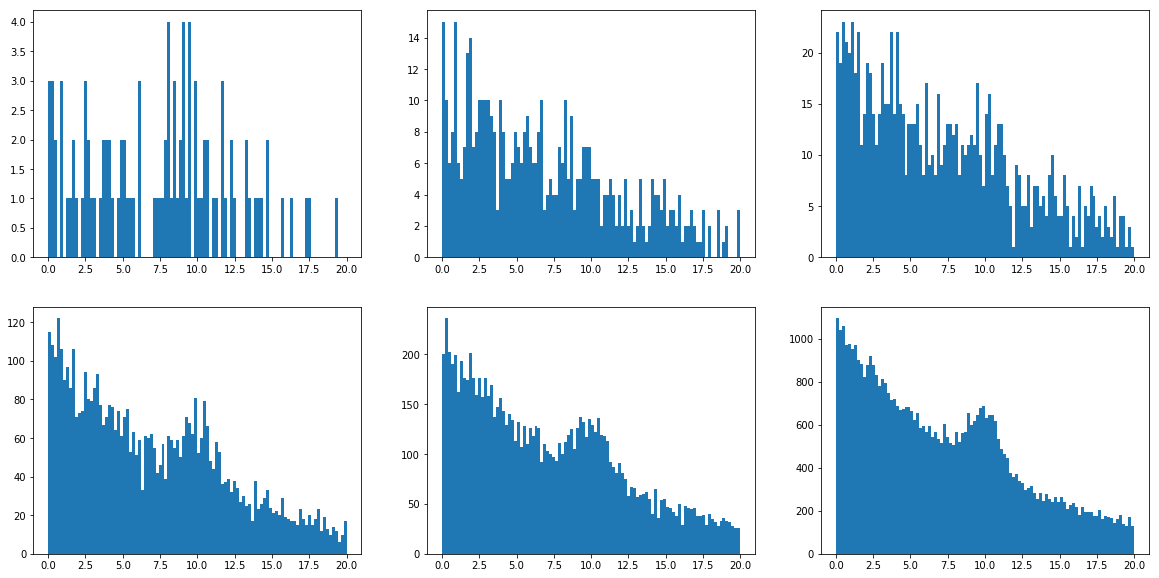

In [11]:
fig, axes = PLT.subplots(nrows=2, ncols=3, figsize=[20,10])
# 2nd order linear
y1, x1, img = axes[0][0].hist(data[0], bins=100, range=[0,20])
y2, x2, img = axes[0][1].hist(data[1], bins=100, range=[0,20])
y3, x3, img = axes[0][2].hist(data[2], bins=100, range=[0,20])
y4, x4, img = axes[1][0].hist(data[3], bins=100, range=[0,20])
y5, x5, img = axes[1][1].hist(data[4], bins=100, range=[0,20])
y6, x6, img = axes[1][2].hist(data[5], bins=100, range=[0,20])

## Fitting

In [12]:
from scipy.optimize import curve_fit

In [13]:
fit_p, fit_v = curve_fit(NoisySignal.y, x6[:-1], y6, p0=mc.p0)

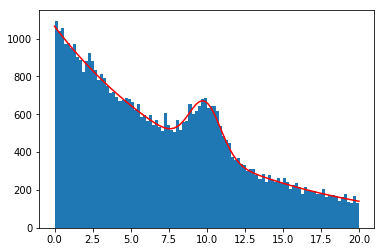

In [14]:
PLT.hist(data[5], bins=100, range=[0,20])
PLT.plot(mc.xs, NoisySignal.y(xs, fit_p[0], fit_p[1], fit_p[2], fit_p[3], fit_p[4], fit_p[5], fit_p[6] ), 'r-')

In [15]:
print(mc.p0)
print(fit_p)

[0.5, 10, 1.5, 0, 2, -0.1, 0]
[ 2.71426392e+02  9.88606339e+00 -1.47156929e+00  2.04760236e+03
  1.07427524e+03 -9.84103717e-02 -2.05719636e+03]


# Evaluation

## Appandix - Make Animation

In [16]:
from matplotlib import animation

In [19]:
data = []
for n in range(100, 50000, 100):
    data.append(mc.generate(n))

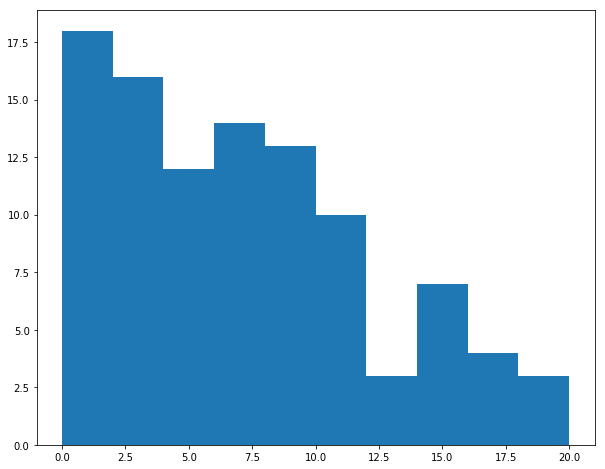

In [39]:
fig, ax = PLT.subplots(figsize=[10,8])

def animate(i):
    ax.clear()
    ax.set_ylim([0,1500])
    ax.hist(data[i], bins=100, range=[0,20])
def init():
    ax.hist(data[0])

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=len(data),
                              init_func=init,
                              interval=20000,
                              blit=False)

In [41]:
# may take a while to save
ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])